<a href="https://colab.research.google.com/github/Sandeephm/CIFAR-100-Image-Classifier/blob/master/CIFAR_100_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import Libraries
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
# Load CIFAR 100 Data Set

splits = ['train[:70%]', 'train[70%:]','test']

(training_set, validation_set,test_set), dataset_info = tfds.load(
'cifar100',
split = splits,
with_info=True,
as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.0.incompleteWRN22Q/cifar100-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.0.incompleteWRN22Q/cifar100-test.tfrecord


Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.0. Subsequent calls will reuse this data.


In [3]:
dataset_info

tfds.core.DatasetInfo(
    name='cifar100',
    version=3.0.0,
    description='This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=20),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=100),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mul

In [4]:
num_classes = dataset_info.features['label'].num_classes

num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

for example in test_set:
  num_test_examples += 1

print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

Total Number of Classes: 100
Total Number of Training Images: 35000
Total Number of Validation Images: 15000 

Total Number of Test Images: 10000 



In [5]:
for i, example in enumerate(training_set.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (32, 32, 3) label: 66
Image 2 shape: (32, 32, 3) label: 23
Image 3 shape: (32, 32, 3) label: 40
Image 4 shape: (32, 32, 3) label: 39
Image 5 shape: (32, 32, 3) label: 7


In [0]:
# Define Rescaled size of Image
IMAGE_RES = 299

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

# Batch Size
BATCH_SIZE = 32

# Training Batch
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
# Validation Batch
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [0]:
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

feature_extractor.trainable = False

**Train the Model**

In [8]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
Total params: 22,007,684
Trainable params: 204,900
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 20

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/20
1094/1094 [==============================] - 198s 181ms/step - loss: 1.7907 - accuracy: 0.5388 - val_loss: 1.3985 - val_accuracy: 0.6213
Epoch 2/20
1094/1094 [==============================] - 195s 178ms/step - loss: 1.1669 - accuracy: 0.6680 - val_loss: 1.3535 - val_accuracy: 0.6355
Epoch 3/20
1094/1094 [==============================] - 195s 179ms/step - loss: 0.9901 - accuracy: 0.7142 - val_loss: 1.2824 - val_accuracy: 0.6502
Epoch 4/20
1094/1094 [==============================] - 194s 178ms/step - loss: 0.8667 - accuracy: 0.7452 - val_loss: 1.3021 - val_accuracy: 0.6504
Epoch 5/20
1094/1094 [==============================] - 194s 177ms/step - loss: 0.7698 - accuracy: 0.7701 - val_loss: 1.3208 - val_accuracy: 0.6507
Epoch 6/20
1094/1094 [==============================] - 194s 178ms/step - loss: 0.6942 - accuracy: 0.7909 - val_loss: 1.3361 - val_accuracy: 0.6516
Epoch 7/20
1094/1094 [==============================] - 194s 178ms/step - loss: 0.6214 - accuracy: 0.8133 - val_

Text(0.5, 1.0, 'Training and Validation Loss')

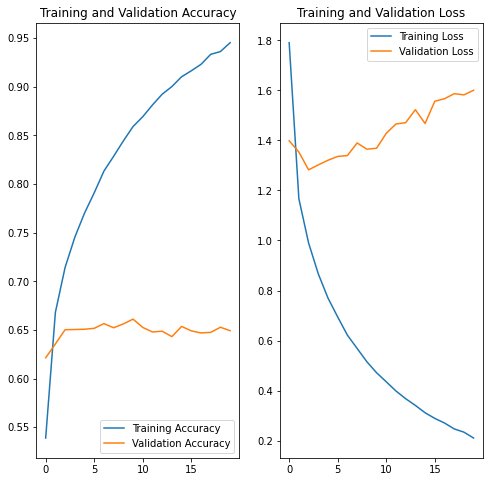

In [10]:
# Plot Accuracy and Loss for Train and Validation Data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [0]:
class_names = np.array(dataset_info.features['label'].names)

In [12]:
image_batch, label_batch = next(iter(train_batches))

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['orchid', 'tank', 'crab', 'leopard', 'worm', 'bottle', 'bridge',
       'beaver', 'caterpillar', 'beetle', 'ray', 'baby', 'clock', 'plain',
       'television', 'rose', 'ray', 'snake', 'poppy', 'clock', 'sea',
       'lion', 'kangaroo', 'pine_tree', 'seal', 'crocodile', 'bridge',
       'bottle', 'possum', 'clock', 'cup', 'wardrobe'], dtype='<U13')

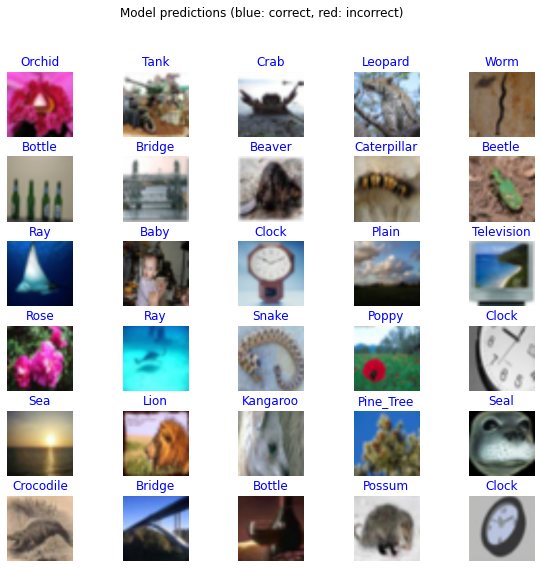

In [13]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [14]:
test_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
image_batch, label_batch = next(iter(test_batches))

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['dolphin', 'keyboard', 'rocket', 'lamp', 'bed', 'clock', 'hamster',
       'poppy', 'cockroach', 'oak_tree', 'skyscraper', 'couch', 'plate',
       'spider', 'otter', 'streetcar', 'crab', 'tulip', 'tractor',
       'kangaroo', 'worm', 'crab', 'lizard', 'butterfly', 'bed',
       'lawn_mower', 'bee', 'streetcar', 'caterpillar', 'lion', 'camel',
       'shark'], dtype='<U13')

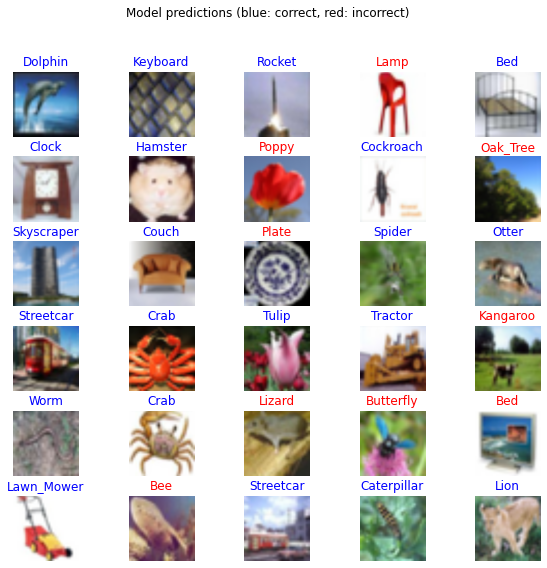

In [15]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")